# DATA PREPROCESSING 

In [2]:
import pandas as pd
file_path = 'TSLA.csv'  

df = pd.read_csv("TSLA.csv")

df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by='Date', inplace=True)

df.reset_index(drop=True, inplace=True)
print(df.head())

        Date   Open   High    Low  Close  Adj Close    Volume
0 2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
1 2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
2 2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
3 2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
4 2010-07-07  3.280  3.326  2.996  3.160      3.160  34608500


# LINEAR REGRESSION

Mean Squared Error: 1472.8150749517376


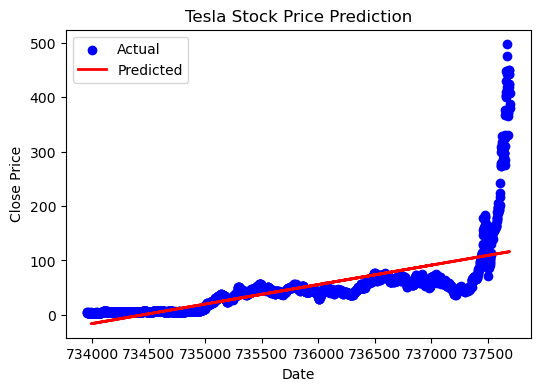

In [4]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

file_path = 'TSLA.csv'  
df = pd.read_csv('TSLA.csv')

df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by='Date', inplace=True)

df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)
X = df[['Date_ordinal']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Stock Price Prediction')
plt.legend()
plt.show()

# LOGISTIC REGRESSION

Accuracy: 0.5
Confusion Matrix:
[[258   0]
 [258   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       258
           1       1.00      0.00      0.00       258

    accuracy                           0.50       516
   macro avg       0.75      0.50      0.33       516
weighted avg       0.75      0.50      0.33       516



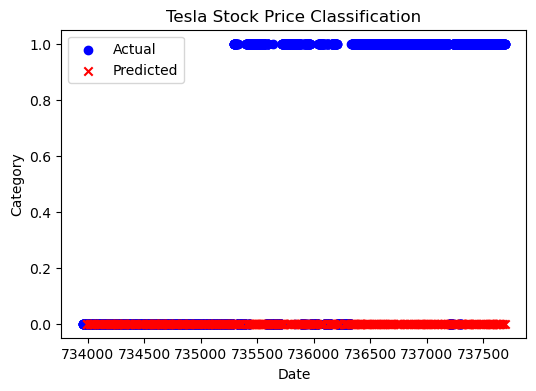

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

file_path = 'TSLA.csv'  
df = pd.read_csv('TSLA.csv')

df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)
median_close = df['Close'].median()
df['Target'] = (df['Close'] > median_close).astype(int)

X = df[['Date_ordinal']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(6, 4))
plt.scatter(X, df['Target'], color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Category')
plt.title('Tesla Stock Price Classification')
plt.legend()
plt.show()


# SVM

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = 'TSLA.csv'  
df = pd.read_csv('TSLA.csv')

df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by='Date', inplace=True)

df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

median_close = df['Close'].median()
df['Target'] = (df['Close'] > median_close).astype(int)

X = df[['Date_ordinal']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8585271317829457
Confusion Matrix:
[[195  63]
 [ 10 248]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       258
           1       0.80      0.96      0.87       258

    accuracy                           0.86       516
   macro avg       0.87      0.86      0.86       516
weighted avg       0.87      0.86      0.86       516



# DECISION TREE

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = 'TSLA.csv'  
df = pd.read_csv('TSLA.csv')

df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by='Date', inplace=True)

df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

median_close = df['Close'].median()
df['Target'] = (df['Close'] > median_close).astype(int)

X = df[['Date_ordinal']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9728682170542635
Confusion Matrix:
[[252   6]
 [  8 250]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       258
           1       0.98      0.97      0.97       258

    accuracy                           0.97       516
   macro avg       0.97      0.97      0.97       516
weighted avg       0.97      0.97      0.97       516



# RANDOM FOREST

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = 'TSLA.csv'  
df = pd.read_csv('TSLA.csv')

df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by='Date', inplace=True)

df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

median_close = df['Close'].median()
df['Target'] = (df['Close'] > median_close).astype(int)

X = df[['Date_ordinal']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9728682170542635
Confusion Matrix:
[[252   6]
 [  8 250]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       258
           1       0.98      0.97      0.97       258

    accuracy                           0.97       516
   macro avg       0.97      0.97      0.97       516
weighted avg       0.97      0.97      0.97       516



# NAIVE BAYES

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = 'TSLA.csv'  # 
df = pd.read_csv('TSLA.csv')

df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by='Date', inplace=True)

df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

median_close = df['Close'].median()
df['Target'] = (df['Close'] > median_close).astype(int)

X = df[['Date_ordinal']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8081395348837209
Confusion Matrix:
[[214  44]
 [ 55 203]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       258
           1       0.82      0.79      0.80       258

    accuracy                           0.81       516
   macro avg       0.81      0.81      0.81       516
weighted avg       0.81      0.81      0.81       516



# KNN

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = 'TSLA.csv'
data = pd.read_csv('TSLA.csv')

data['Next_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)
data['Target'] = (data['Next_Close'] > data['Close']).astype(int)
X = data[['Close']].values
y = data['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)



Accuracy: 0.50
Confusion Matrix:
[[121 125]
 [132 138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.49      0.48       246
           1       0.52      0.51      0.52       270

    accuracy                           0.50       516
   macro avg       0.50      0.50      0.50       516
weighted avg       0.50      0.50      0.50       516



# VISUALIZATION

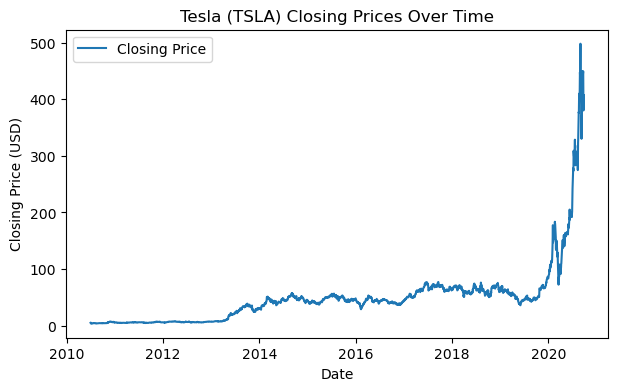

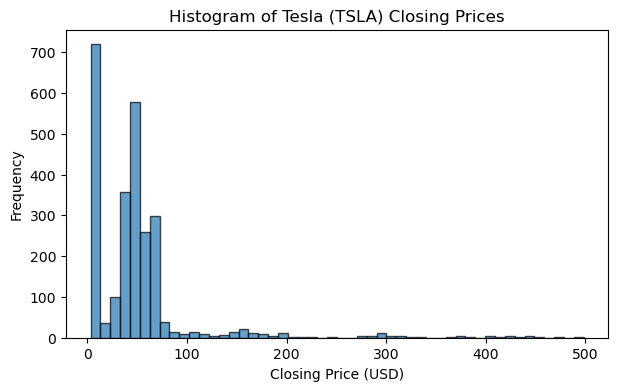

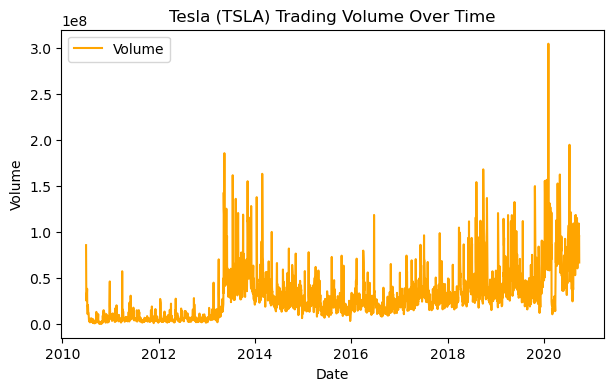

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'TSLA.csv'
data = pd.read_csv('TSLA.csv')

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

plt.figure(figsize=(7, 4))
plt.plot(data['Close'], label='Closing Price')
plt.title('Tesla (TSLA) Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

plt.figure(figsize=(7, 4))
plt.hist(data['Close'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Tesla (TSLA) Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(data['Volume'], label='Volume', color='orange')
plt.title('Tesla (TSLA) Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()
